# **ML TASK4-REGRESSION**

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:  Data
Dear students,
Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor
Rootmap:
1. Understand problem statement
2. Import necessary libraries and data
3.  Check the data
Info()
Describe((
Isnull()
Duplicated()
Df. Columns
Length of unique values in each column.
4. Data preprocessing
Drop car id
Find unique values in categorical or count plot
extract company name from car name and address this new col to df also remove car name column.
There are spelling mistakes in company name. Treat this.
Label encoding all the categorical columns
Outliers detection and removal( if present)
5. Feature selection
Find correlation matrix
Remove multicolinearity (remove features with High correlation .85 to 1)
6. Data splitting
Test, train
7. Model selection and implementation
8. Model evaluation

#***1. Understand the Problem Statement***


**Objective**: Predict the price of cars using various features in the dataset.

**Goal**: Identify significant variables and understand how they influence car prices.

# ***2. Import Necessary Libraries and Data***



In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#IMPORTING DATASET
df = pd.read_csv("//content/CarPrice_Assignment.csv")


# ***3. Check the Data***

In [2]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
# Summary statistics
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
# Check for missing values
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Display column names and count unique values in each column
df.columns
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


# ***4. Data Preprocessing***

In [7]:
#Drop Unnecessary Columns: Drop irrelevant columns like car_ID
df.drop(columns=['car_ID'], inplace=True)

In [8]:
#Extract Company Name: Extract the company name from the car name
df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop(columns=['CarName'], inplace=True)


In [9]:
#Correct Spelling Errors: Fix any spelling mistakes in the company names
df['company'].replace({'maxda': 'mazda', 'vw': 'volkswagen', 'vokswagen': 'volkswagen',
                       'porcshce': 'porsche', 'toyouta': 'toyota', 'Nissan': 'nissan'}, inplace=True)


In [10]:
#Encode Categorical Variables: Use label encoding for categorical features.
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


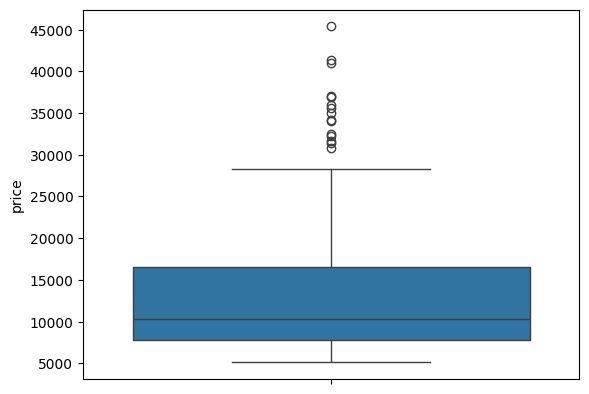

In [11]:
#Outlier Detection and Removal: Identify and remove outliers if needed.
# Visualize outliers
sns.boxplot(df['price'])

# Optionally, remove outliers
df = df[(df['price'] < df['price'].quantile(0.99)) & (df['price'] > df['price'].quantile(0.01))]


# ***5. Feature Selection***

<Axes: >

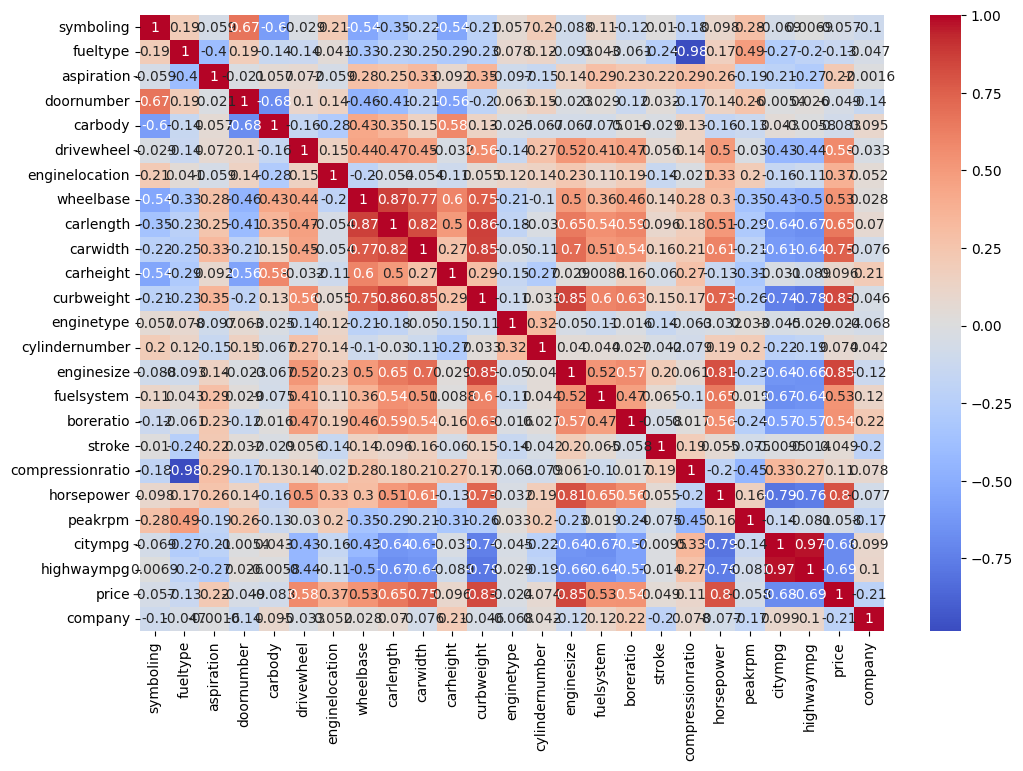

In [12]:
#Correlation Matrix: Identify highly correlated features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [13]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

# ***6. Data Splitting***

In [14]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***7. Model Selection and Implementation***

In [15]:
#Apply Regression Models: Implement the five regression models.
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


# ***8. Model Evaluation***

In [16]:
for model, result in model_results.items():
    print(f"{model}:\n RMSE: {result['RMSE']}\n R2 Score: {result['R2']}\n")


Linear Regression:
 RMSE: 4079.5443074054356
 R2 Score: 0.8291304720786412

Decision Tree Regressor:
 RMSE: 3926.3059893616573
 R2 Score: 0.8417259935421935

Random Forest Regressor:
 RMSE: 2646.0980110495516
 R2 Score: 0.9281125359129792

Gradient Boosting Regressor:
 RMSE: 2301.763323851782
 R2 Score: 0.9456045414132535

Support Vector Regressor:
 RMSE: 12128.405632603177
 R2 Score: -0.5102496294012142

